In [1]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import json
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#from config import local_db_user, local_db_pwd, local_db_endpoint, local_db_port, local_db_name
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name

In [2]:
cloud_engine = create_engine(f"postgresql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [3]:
cloud_conn = cloud_engine.connect()

In [4]:
africa_data = pd.read_sql("select * from ultimate where year=2018", cloud_conn)

In [5]:
africa_data.dtypes

country_name                            object
country_code                            object
year                                     int64
conflict_frequency_code                  int64
conflict_deaths_code                   float64
population_density                     float64
population_growth_annual_per           float64
total_population                       float64
refugee_pop_origin                      object
rural_population                       float64
rural_population_per                   float64
rural_population_growth                float64
urban_population                       float64
urban_population_per                   float64
urban_population_growth                float64
corruption_control_estimate            float64
corruption_control_percentile          float64
government _effectiveness_est          float64
government_effectiveness_percentile    float64
stability_est                          float64
stability_percentile                   float64
regulatory_es

In [6]:
africa_data.columns

Index(['country_name', 'country_code', 'year', 'conflict_frequency_code',
       'conflict_deaths_code', 'population_density',
       'population_growth_annual_per', 'total_population',
       'refugee_pop_origin', 'rural_population', 'rural_population_per',
       'rural_population_growth', 'urban_population', 'urban_population_per',
       'urban_population_growth', 'corruption_control_estimate',
       'corruption_control_percentile', 'government _effectiveness_est',
       'government_effectiveness_percentile', 'stability_est',
       'stability_percentile', 'regulatory_est', 'regulatory_percentile',
       'ruleoflaw_est', 'ruleoflaw_percentile', 'accountability_est',
       'accountability_percentile ', 'ethnic_score', 'gdp_growth_per',
       'gdp_percap_per', 'mortality_rate', 'gdp_total', 'gdp_percap',
       'gni_total', 'fdi_inflows_gdp', 'fdi_inflows_total',
       'conflict_fatalities', 'conflict_events'],
      dtype='object')

In [30]:
africa_gov=africa_data[['corruption_control_estimate','government _effectiveness_est', 'stability_est', 'conflict_fatalities']]
africa_gov.head()

,corruption_control_estimate,government _effectiveness_est,stability_est,conflict_fatalities
0,-0.64,-0.44,-0.79,66
1,-1.14,-1.05,-0.32,41
2,-0.38,-0.57,-0.13,30
3,0.75,0.33,0.98,1
4,-0.11,-0.58,-1.04,303


In [32]:
X=africa_gov[['corruption_control_estimate','government _effectiveness_est', 'stability_est']]
y=africa_gov['conflict_fatalities'].values.reshape(-1,1)
print(X.shape, y.shape)

(52, 3) (52, 1)


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,corruption_control_estimate,government _effectiveness_est,stability_est
6,0.77,0.32,0.75
34,-0.78,-0.87,-0.78
4,-0.11,-0.58,-1.04
37,-1.04,-1.02,-2.19
24,-0.85,-0.41,-1.16


In [35]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [36]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled)

[[ 2.22811587  1.85386988  1.83297696]
 [-0.19000988 -0.16343613 -0.15563641]
 [ 0.85524447  0.32817626 -0.4935707 ]
 [-0.59563097 -0.41771839 -1.98828009]
 [-0.29921556  0.61636283 -0.64954038]
 [ 0.99565178  1.88777418  0.49423724]
 [ 0.68363555  0.95540586  0.42924988]
 [-0.59563097  0.27731981 -0.03865915]
 [-1.03245369 -1.62132113  0.06532063]
 [-1.17286099 -1.28227811 -1.06545951]
 [ 0.68363555  0.19255905  0.45524482]
 [-0.06520339 -0.38381409 -1.80631547]
 [ 0.12200634  0.00608539 -0.77951511]
 [ 0.87084529 -0.14648397  0.57222208]
 [-1.31326829 -1.31618241 -1.89729778]
 [ 0.02840148  0.56550638 -0.16863388]
 [ 0.32481689  0.02303754  0.130308  ]
 [-1.39127235 -1.82474695 -2.31321692]
 [-0.23681231  0.07389399 -0.0126642 ]
 [ 1.93170045  1.66739621  1.01413616]
 [-0.12760664  0.07389399  0.42924988]
 [-1.20406261 -1.43484747 -1.53336854]
 [-0.75163909 -0.46857485  0.44224735]
 [-0.59563097 -0.33295764 -0.28561114]
 [ 0.43402257  0.34512841  0.68919934]
 [ 1.307668    0.22646335

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
X_train_scaled[0]

array([2.22811587, 1.85386988, 1.83297696])

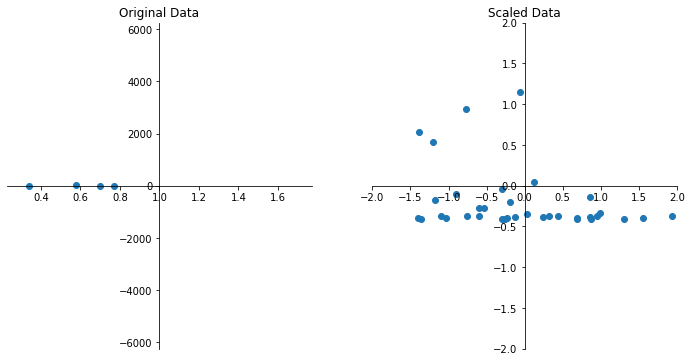

In [39]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train['corruption_control_estimate'].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['corruption_control_estimate'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [40]:
summodel = sm.OLS(y, X)
results = summodel.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.507
Model:                            OLS   Adj. R-squared (uncentered):              0.477
Method:                 Least Squares   F-statistic:                              16.82
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                    1.20e-07
Time:                        19:44:11   Log-Likelihood:                         -419.30
No. Observations:                  52   AIC:                                      844.6
Df Residuals:                      49   BIC:                                      850.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [17]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22252203951978472, R2: 0.02631896383038368


In [18]:
africa_data.columns

Index(['country_name', 'country_code', 'year', 'conflict_frequency_code',
       'conflict_deaths_code', 'population_density',
       'population_growth_annual_per', 'total_population',
       'refugee_pop_origin', 'rural_population', 'rural_population_per',
       'rural_population_growth', 'urban_population', 'urban_population_per',
       'urban_population_growth', 'corruption_control_estimate',
       'corruption_control_percentile', 'government _effectiveness_est',
       'government_effectiveness_percentile', 'stability_est',
       'stability_percentile', 'regulatory_est', 'regulatory_percentile',
       'ruleoflaw_est', 'ruleoflaw_percentile', 'accountability_est',
       'accountability_percentile ', 'ethnic_score', 'gdp_growth_per',
       'gdp_percap_per', 'mortality_rate', 'gdp_total', 'gdp_percap',
       'gni_total', 'fdi_inflows_gdp', 'fdi_inflows_total',
       'conflict_fatalities', 'conflict_events'],
      dtype='object')

In [19]:
africa_gov2=africa_data[[ 'stability_est', 'regulatory_est', 'ruleoflaw_est', 'accountability_est', 'conflict_fatalities']]
africa_gov2


,stability_est,regulatory_est,ruleoflaw_est,accountability_est,conflict_fatalities
0,-0.79,-1.26,-0.78,-0.98,66
1,-0.32,-1.00,-1.05,-0.92,41
2,-0.13,-0.34,-0.68,0.27,30
3,0.98,0.45,0.47,0.47,1
4,-1.04,-0.39,-0.45,-0.04,303
5,-1.60,-0.98,-1.50,-1.65,327
6,0.75,-0.24,0.45,1.00,0
7,-1.38,-0.80,-1.08,-1.10,1513
8,-2.28,-1.37,-1.69,-1.19,1171
9,-1.48,-1.11,-1.31,-1.45,259


In [20]:
X=africa_gov2[['stability_est', 'regulatory_est', 'ruleoflaw_est', 'accountability_est']]
y=africa_gov2['conflict_fatalities'].values.reshape(-1,1)
print(X.shape, y.shape)

(52, 4) (52, 1)


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,stability_est,regulatory_est,ruleoflaw_est,accountability_est
6,0.75,-0.24,0.45,1.00
34,-0.78,-0.73,-1.04,-0.47
4,-1.04,-0.39,-0.45,-0.04
37,-2.19,-0.88,-0.88,-0.41
24,-1.16,-0.23,-0.41,-0.36


In [23]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [24]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled)

[[ 1.83297696e+00  9.18788978e-01  2.05105855e+00  2.14628671e+00]
 [-1.55636407e-01  7.42455740e-02 -6.20696937e-01  1.48452369e-01]
 [-4.93570704e-01  6.60255283e-01  4.37246509e-01  7.32852891e-01]
 [-1.98828009e+00 -1.84288121e-01 -3.33797020e-01  2.29996628e-01]
 [-6.49540379e-01  9.36024558e-01  5.08971489e-01  2.97950177e-01]
 [ 4.94237241e-01  1.62544774e+00  1.06484008e+00  1.68420258e+00]
 [ 4.29249876e-01  9.18788978e-01  9.93115100e-01 -1.09771118e-01]
 [-3.86591503e-02  9.01553398e-01  7.24146427e-01 -1.23361828e-01]
 [ 6.53206333e-02 -2.51109138e+00 -1.60691540e+00 -2.17555901e+00]
 [-1.06545951e+00 -5.80706454e-01 -1.10484055e+00 -1.18343719e+00]
 [ 4.55244822e-01  2.98308110e-01  7.95871406e-01 -1.03393939e+00]
 [-1.80631547e+00  3.84486008e-01 -1.90347061e-01  3.65903726e-01]
 [-7.79515109e-01  2.29365791e-01  2.04140326e-01 -1.04543922e-03]
 [ 5.72222079e-01  4.70663906e-01  6.34490203e-01  8.95941409e-01]
 [-1.89729778e+00 -1.20118732e+00 -1.94760906e+00 -1.26498145e

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
X_train_scaled[0]

array([1.83297696, 0.91878898, 2.05105855, 2.14628671])

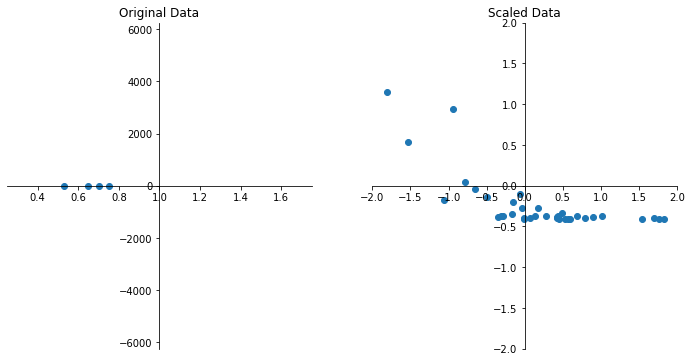

In [27]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train['stability_est'].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['stability_est'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [28]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2550233438521899, R2: -0.11589572981314912


In [29]:
summodel = sm.OLS(y, X)
results = summodel.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.515
Model:                            OLS   Adj. R-squared (uncentered):              0.475
Method:                 Least Squares   F-statistic:                              12.74
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                    3.84e-07
Time:                        19:39:34   Log-Likelihood:                         -418.90
No. Observations:                  52   AIC:                                      845.8
Df Residuals:                      48   BIC:                                      853.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------